<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Permutation_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name', 'CPLEXStatus','type','indeks']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

X['m/n'] = X['m/n'].apply(lambda x: x*100000)
X['(m/n)^2'] = X['(m/n)^2'].apply(lambda x: x*100000)
X['(m/n)^3'] = X['(m/n)^3'].apply(lambda x: x*100000)
shuffled = shuffled.drop(['CPLEXStatus', 'indeks', 'index'], axis = 1)
print(X.head())

   subtype  class    n   m  n/m  (n/m)^2  (n/m)^3      m/n  (m/n)^2  (m/n)^3  \
0        5      3   18   6  3.0      9.0     27.0  33333.3  11111.1   3703.7   
1       10      7  180  36  5.0     25.0    125.0  20000.0   4000.0    800.0   
2       12      7  162  18  9.0     81.0    729.0  11111.1   1234.6    137.2   
3       10      5   40   8  5.0     25.0    125.0  20000.0   4000.0    800.0   
4        8      4  120  30  4.0     16.0     64.0  25000.0   6250.0   1562.5   

    av.length     std.dev  median  range  min   max    k  
0   79.833336   13.115998    84.0     39   59    98   14  
1  726.744446  171.113617   735.0    970  293  1263  159  
2  636.950623  157.782181   634.0    785  263  1048  147  
3  103.324997   54.233765   113.0    216    3   219   38  
4   93.683334   22.522442    94.0    139   33   172   66  


In [2]:
from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [3]:
from sklearn.metrics import mean_squared_error

rmse_full_mod = mean_squared_error(regr.predict(X_test), y_test, squared = False)

results = []

X = pd.DataFrame(X, columns=select)
X_test = pd.DataFrame(X_test, columns=X.columns)

for predictor in X_test:
    #print(predictor)
    X_test_copy = X_test.copy()
    #X_test_copy = X_test_copy.astype('int')
    
    X_test_copy[predictor] = X_test[predictor].sample(frac=1).values
    
    new_rmse = mean_squared_error(regr.predict(X_test_copy), y_test, squared = False)
    
    results.append({'pred': predictor,
                    'score': new_rmse - rmse_full_mod })

resultsdf = pd.DataFrame(results).sort_values(by = 'score', ascending = False)
resultsdf



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

,pred,score
11,std.dev,10804.894782
2,n,6118.569498
16,k,4386.850677
10,av.length,3622.565332
13,range,3053.892747
9,(m/n)^3,1643.270110
8,(m/n)^2,1468.801696
15,max,1391.385789
12,median,1298.821753
7,m/n,732.555532


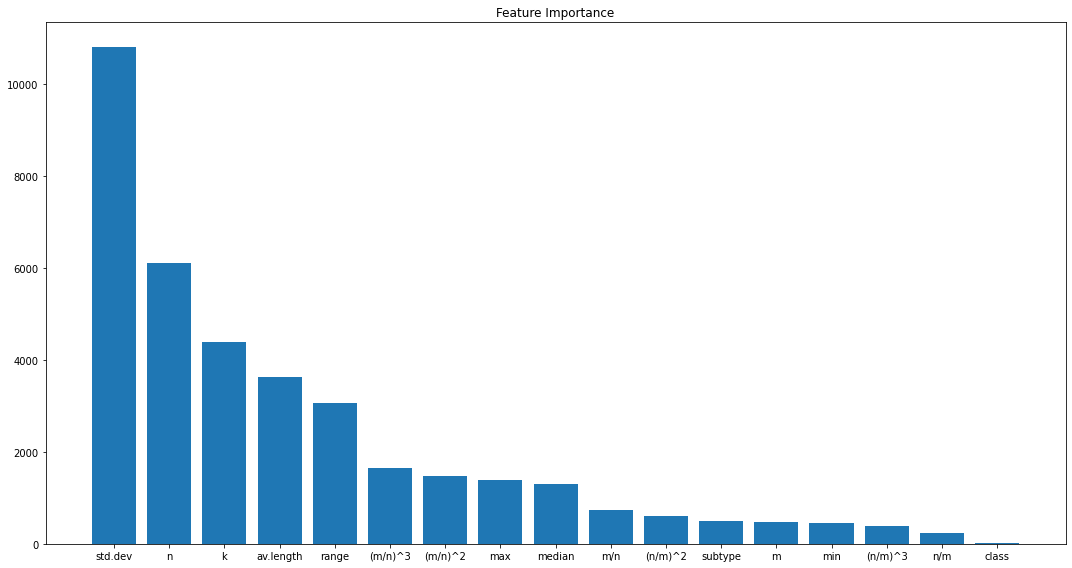

In [4]:
plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.bar(resultsdf.pred, resultsdf.score)
plt.tight_layout()
plt.show()